# Some ways of dealing with unbalanced data

### In some notable cases the instances that we wish to predict are very much in the minority of all data points. Fraud and disease diagnosis are exemplars. Where one class composes 99% of all data, models soon learn that they can achieve 99% accuracy by selecting the most common class. 99% accuracy and completely useless.

#### There are various ways that these unbalanced data sets can be managed. One of them is by modifying the data set so that the number of samples in each class is roughly equal. This allows a model to learn to predict based on other attributes.

#### This notebook describes several implementations of the imbalanced-learn project. It was started to focus on SMOTE- Synthetic Minority Over-sampling Technique and has been extended to several other algorithms for reducing the imbalance in the data set.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

https://imbalanced-learn.readthedocs.io/en/stable/index.html

In [1]:
# import several imblearn libraries
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import ADASYN


#### Helper functions

In [47]:
def separate_classes(X,Y):
    c0_indices = np.nonzero(Y==0)
    c1_indices = np.nonzero(Y==1)
    Xmin = X[c0_indices]
    Ymin = Y[c0_indices]
    Xmaj = X[c1_indices]
    Ymaj = Y[c1_indices]
    return Xmin, Ymin, Xmaj, Ymaj

def plotScatterFigures(X, Y, title='Plot title', file_ext=1):
    Xmin, Ymin, Xmaj, Ymaj = separate_classes(X,Y)
    colorMin = '#FF00FF'
    colorMaj = '#00CED1'
    plt.figure(num=None, figsize=(8, 8), dpi=100)
    fig, ax = plt.subplots()
    plt.title(title, fontsize=20)
    plt.scatter(Xmaj[:,0], Xmaj[:,1], marker='o', s=30, c=colorMaj, edgecolor='k', linewidth=0.2)
    plt.scatter(Xmin[:,0], Xmin[:,1], marker='o', s=30, c=colorMin, edgecolor='k', linewidth=0.5)
    print("Samples in minority class: " + str(Ymin.size))
    print("Samples in majority class: " + str(Ymaj.size))
    # Styling
    ax.set_xlim([-2,4])
    ax.set_ylim([-4,4])
    ax.patch.set_facecolor('#EAEAF1')
    ax.set_axisbelow(True)
    ax.minorticks_on()
    ax.grid(which='major', linestyle="-", linewidth='2.5', color='w')
    ax.grid(which='minor', linestyle='-', linewidth='0.5', color='w')
    ax.set_yticklabels([]), ax.set_xticklabels([])
    ax.tick_params(
                   which='both', # Options for both major and minor ticks
                   top=False, # turn off top ticks
                   left=False, # turn off left ticks
                   right=False,  # turn off right ticks
                   bottom=False
                  )
    plt.savefig(title.replace(" ", "_")+str(file_ext)+'.png', bbox_inches='tight', dpi=300)
    
def plotCircles(Xmin, Ymin, Xmaj, Ymaj, title='Plot title'):
    colorMin = '#FF00FF'
    colorMaj = '#00CED1'
    plt.figure(num=None, figsize=(8, 8), dpi=100)
    fig, ax = plt.subplots()
    plt.title(title, fontsize=20)
    plt.scatter(Xmaj[:,0], Xmaj[:,1], marker='o', s=100, c=colorMaj, edgecolor='k', linewidth=0.2)
    plt.scatter(Xmin[:,0], Xmin[:,1], marker='o', s=100, c=colorMin, edgecolor='k', linewidth=0.5)
    print("Samples in minority class: " + str(Ymin.size))
    print("Samples in majority class: " + str(Ymaj.size))
    # Styling
    ax.patch.set_facecolor('#EAEAF1')
    ax.set_axisbelow(True)
    ax.minorticks_on()
    ax.grid(which='major', linestyle="-", linewidth='2.5', color='w')
    ax.grid(which='minor', linestyle='-', linewidth='0.5', color='w')
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(
                   which='both', # Options for both major and minor ticks
                   top=False, # turn off top ticks
                   left=False, # turn off left ticks
                   right=False,  # turn off right ticks
                   bottom=False
                  )
    plt.savefig(title.replace(" ", "_")+'2.png', bbox_inches='tight', dpi=300)

 ### Construct the basic distribution
 
 This distribution has 1000 majority instances and 10 minority instances

Samples in minority class: 10
Samples in majority class: 1000


<Figure size 800x800 with 0 Axes>

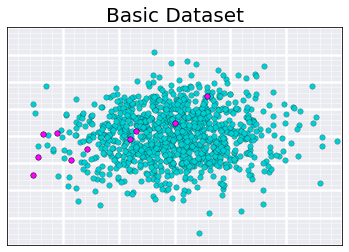

In [48]:
X, Y = make_classification(n_features=2,
                             n_redundant=0,
                             n_informative=1,
                             n_samples=1010,
                             weights=[0.006, 0.994],
                             n_clusters_per_class=1,
                             random_state=6)
plotScatterFigures(X, Y, 'Basic Dataset',1);


### Random under sampling
This method selects items from majority class equal to the items from the minority class

Samples in minority class: 10
Samples in majority class: 10


<Figure size 800x800 with 0 Axes>

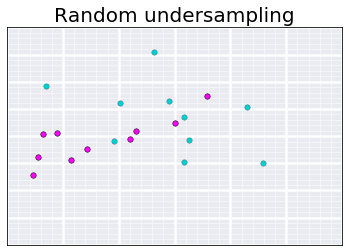

In [38]:
rus = RandomUnderSampler()
X_iru, Y_iru = rus.fit_sample(X, Y)
plotScatterFigures(X_iru, Y_iru, 'Random undersampling',2)

### Centroid-based undersampling

Under samples the majority class by replacing a cluster of majority samples by the cluster centroid of a KMeans algorithm. This algorithm keeps N majority samples by fitting the KMeans algorithm with N cluster to the majority class and using the coordinates of the N cluster centroids as the new majority samples.

Samples in minority class: 10
Samples in majority class: 10


<Figure size 800x800 with 0 Axes>

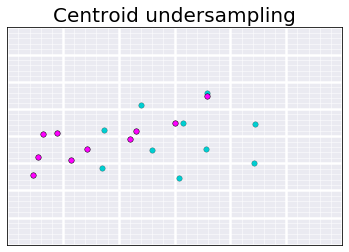

In [39]:
# Keep 10 items from class 1, and all minority class 0
cc = ClusterCentroids(sampling_strategy='auto')
X_icc, Y_icc = cc.fit_sample(X, Y)
plotScatterFigures(X_icc, Y_icc, 'Centroid undersampling',2)

### Tomek links
Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes.

Tomek linka exist if the two samples are of different classes and nearest neighbors of each other"

Paper: I. Tomek, “Two modifications of CNN,” In Systems, Man, and Cybernetics, IEEE Transactions on, vol. 6, pp 769-772, 2010

Samples in minority class: 10
Samples in majority class: 40
Samples in minority class: 10
Samples in majority class: 34


<Figure size 800x800 with 0 Axes>

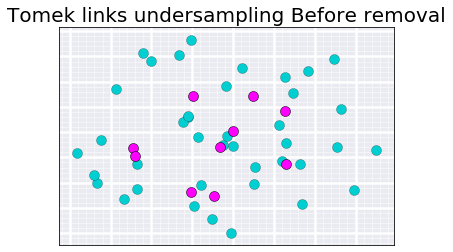

<Figure size 800x800 with 0 Axes>

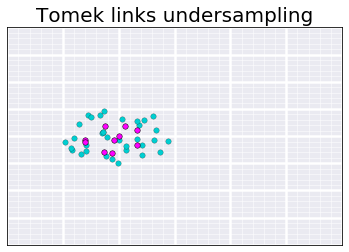

In [65]:

# Generate minority class
np.random.seed(1)
pts = 10
X0 = np.zeros((pts,2))
Y0 = np.zeros((pts,1))
for i in range(pts):
    length = np.sqrt(np.random.uniform(0, 1))
    angle = 2*np.pi * np.random.uniform(0, 1)
    x = length * np.cos(angle)
    y = length * np.sin(angle)
    X0[i,0] = x
    X0[i,1] = y
    Y0[i] = 0

# Generate majority class
pts = 40
X1 = np.zeros((pts,2))
Y1 = np.zeros((pts,1))
for i in range(pts):
    length = np.sqrt(np.random.uniform(0, 1))
    angle = 2*np.pi * np.random.uniform(0, 1)
    x = length * np.cos(angle)
    y = length * np.sin(angle)
    X1[i,0] = x
    X1[i,1] = y
    Y1[i] = 1

plotCircles(X0, Y0, X1, Y1, 'Tomek links undersampling Before removal')
Xt = np.concatenate((X0,X1), axis = 0)
Yt = np.concatenate((Y0,Y1), axis = 0)

# Removing Tomek links
#from imblearn.under_sampling import TomekLinks
# Ratio paremer set to resample the majority class
tl = TomekLinks(sampling_strategy='auto')
X_itl, Y_itl = tl.fit_sample(Xt, Yt.ravel())
plotScatterFigures(X_itl, Y_itl, 'Tomek links undersampling')

### Alternatively we can oversample the minority class


Samples in minority class: 1000
Samples in majority class: 1000


<Figure size 800x800 with 0 Axes>

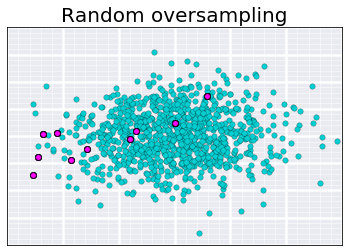

In [57]:
ros = RandomOverSampler(sampling_strategy='minority')
X_iro, Y_iro = ros.fit_sample(X, Y)
plotScatterFigures(X_iro, Y_iro, 'Random oversampling',2)


### Synthetic Minority Over-sampling (SMOTE)
SMOTE generates noisy samples from "interpolations of the minority class"

"The SMOTE consists of synthesizing elements for the minority class, based on those that already exist. It works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors."

Paper: N. V. Chawla, K. W. Bowyer, L. O.Hall, W. P. Kegelmeyer, “SMOTE: synthetic minority over-sampling technique,” Journal of artificial intelligence research, 321-357, 2002.

### We start with a tiny version - Easy Dataset

Samples in minority class: 6
Samples in majority class: 3
Samples in minority class: 6
Samples in majority class: 6


<Figure size 800x800 with 0 Axes>

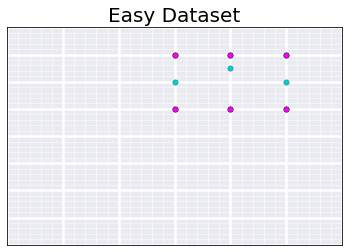

<Figure size 800x800 with 0 Axes>

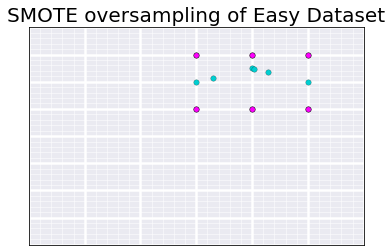

In [59]:

# Easy dataset
X1 = np.array([[1,1],[2,1],[3,1],[1,3],[2,3],[3,3],[1,2],[2,2.5],[3,2]])
Y1 = np.array([0,0,0,0,0,0,1,1,1])
plotScatterFigures(X1, Y1, 'Easy Dataset',1)

# SMOTE on easy dataset
#from imblearn.over_sampling import SMOTE
# Resample only the minority class
smote = SMOTE(sampling_strategy='auto',k_neighbors=1, random_state=4)
X_ism, Y_ism = smote.fit_sample(X1, Y1)
plotScatterFigures(X_ism, Y_ism, 'SMOTE oversampling of Easy Dataset',2)




### SMOTE oversampling of Basic Dataset

Samples in minority class: 1000
Samples in majority class: 1000


<Figure size 800x800 with 0 Axes>

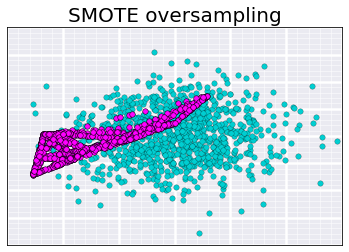

In [58]:
# Resample only the minority class
smote = SMOTE(sampling_strategy='auto', random_state=4)
X_ism, Y_ism = smote.fit_sample(X, Y)
plotScatterFigures(X_ism, Y_ism, 'SMOTE oversampling',6)

### Adaptive Synthetic (ADASYN)
"This is a major difference compared to the SMOTE algorithm, in which equal numbers of synthetic samples are generated for each minority data example. Our objective here is to providing different weights for different minority examples to compensate for the skewed distributions"

Paper: He, Haibo, Yang Bai, Edwardo A. Garcia, and Shutao Li. “ADASYN: Adaptive synthetic sampling approach for imbalanced learning” In IEEE International Joint Conference on Neural Networks (IEEE World Congress on Computational Intelligence), pp. 1322-1328, 2008.

Samples in minority class: 997
Samples in majority class: 1000


<Figure size 800x800 with 0 Axes>

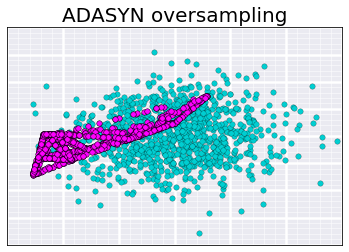

In [60]:

# ADASYN
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(sampling_strategy='auto', random_state=4)
X_iad, Y_iad = adasyn.fit_sample(X, Y)
plotScatterFigures(X_iad, Y_iad, 'ADASYN oversampling',2)

### Oversampling and Undersampling (SMOTE + Tomek links)
Combining oversampling and undersampling, using the SMOTE and Tomek links.

Samples in minority class: 10
Samples in majority class: 1000
Samples in minority class: 972
Samples in majority class: 972


<Figure size 800x800 with 0 Axes>

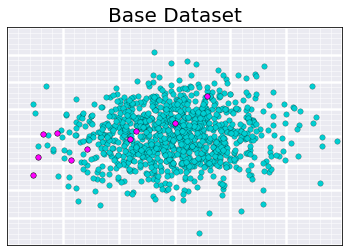

<Figure size 800x800 with 0 Axes>

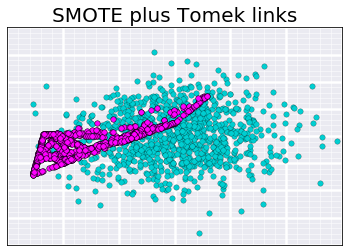

In [63]:
# SMOTETomek
#from imblearn.combine import SMOTETomek
smt = SMOTETomek()
X_smt, y_smt = smt.fit_sample(X, Y)
plotScatterFigures(X, Y, 'Base Dataset',2)
plotScatterFigures(X_smt, y_smt, 'SMOTE plus Tomek links',2)